In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/6_LR/bank_full.csv", sep=';')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dataset.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

Text(0.5, 1.0, "Box plot of 'previous'")

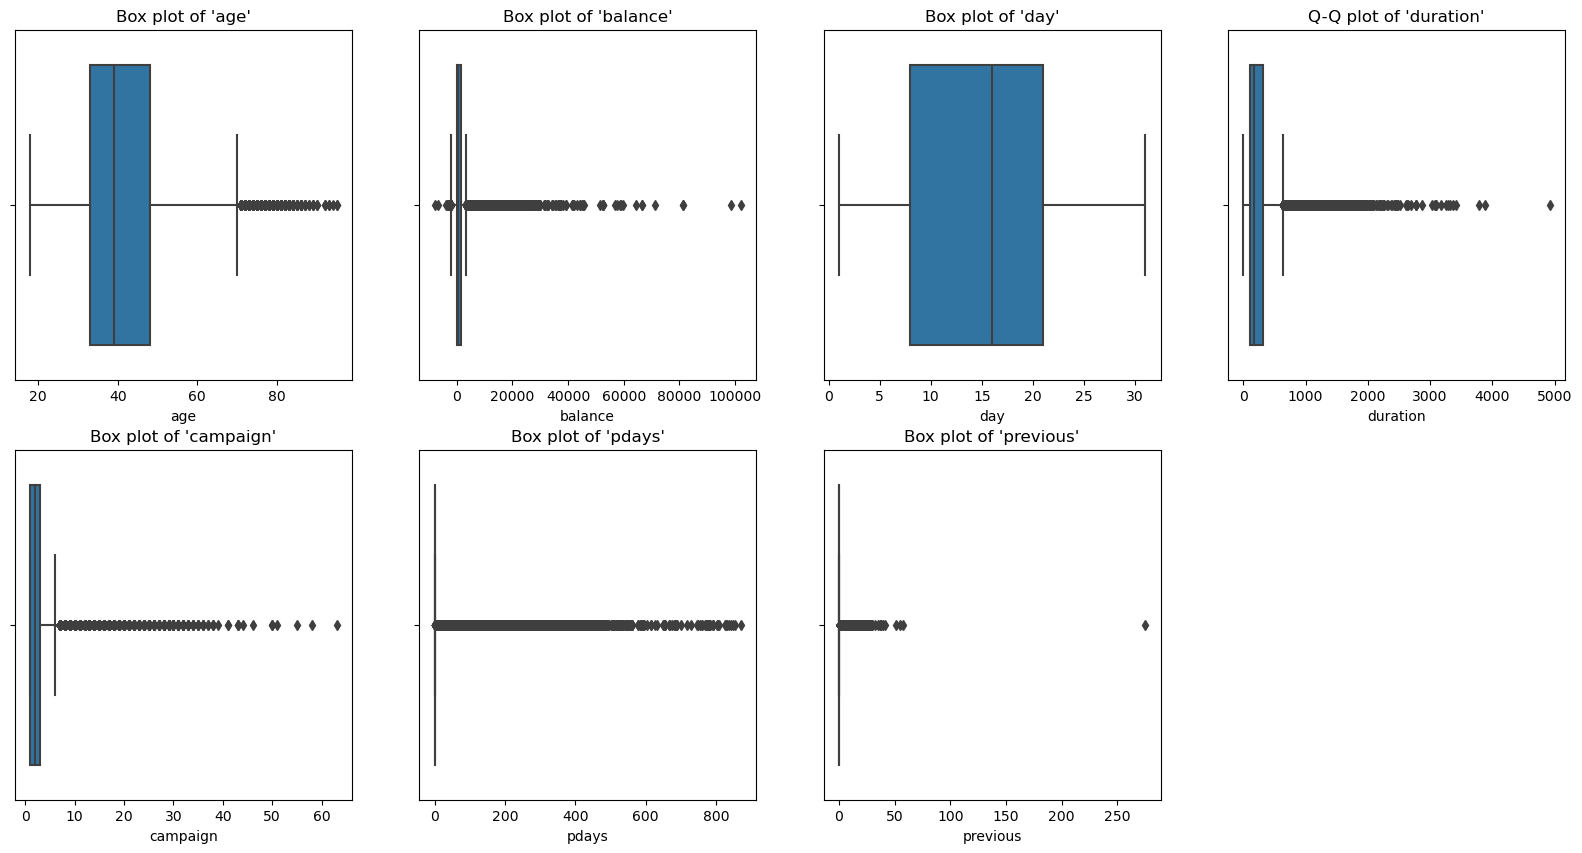

In [7]:
# # box plot
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
sns.boxplot(dataset['age'])
plt.title("Box plot of 'age'")

plt.subplot(2,4,2)
sns.boxplot(dataset['balance'])
plt.title("Box plot of 'balance'")

plt.subplot(2,4,3)
sns.boxplot(dataset['day'])
plt.title("Box plot of 'day'")

plt.subplot(2,4,4)
sns.boxplot(dataset['duration'])
plt.title("Q-Q plot of 'duration'")

plt.subplot(2,4,5)
sns.boxplot(dataset['campaign'])
plt.title("Box plot of 'campaign'")

plt.subplot(2,4,6)
sns.boxplot(dataset['pdays'])
plt.title("Box plot of 'pdays'")

plt.subplot(2,4,7)
sns.boxplot(dataset['previous'])
plt.title("Box plot of 'previous'")


# dataset contains many outliers and highly skewed data distribution

In [8]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [9]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [10]:
def ROC_AUC(y_test,y_pred_prob):
    classes = y_test.columns[0]

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

Accuracy of Logistic regression on training set: 0.8881
Accuracy of Logistic regression on test set: 0.8857


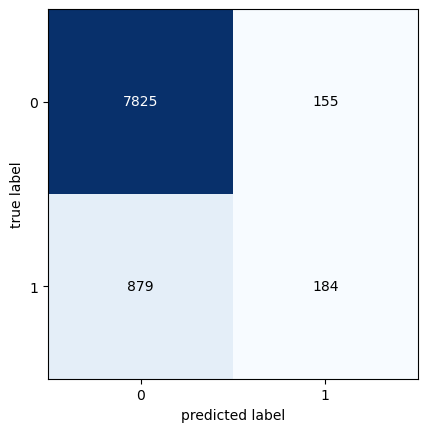


Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.72
Macro Recall: 0.58
Macro F1-score: 0.60

Weighted Precision: 0.86
Weighted Recall: 0.89
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.54      0.17      0.26      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



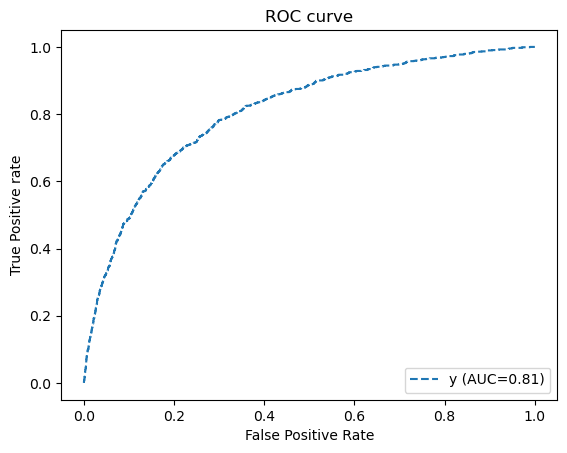

AUC_Score:  0.8092623374051309


In [12]:
def model(dataset):
    
    X = dataset.iloc[:,:-1] # independant variables
    y = dataset.iloc[:,16:] ## dependant variable
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    X['default']= label_encoder.fit_transform(X['default'])
    X['housing']= label_encoder.fit_transform(X['housing'])
    X['loan']= label_encoder.fit_transform(X['loan'])
    X['month']= label_encoder.fit_transform(X['month'])
    y['y']= label_encoder.fit_transform(y['y'])
    X=pd.get_dummies(columns=['education','job','marital','contact','poutcome'],data=X)

    X=X.astype(int)
    y=y.astype(int)
    
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
        
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print('Accuracy of Logistic regression on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)

    
    confusion_matrix(y_test,y_pred)


    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)
    
model(dataset)


Accuracy of Logistic regression on training set: 0.9012
Accuracy of Logistic regression on test set: 0.8976


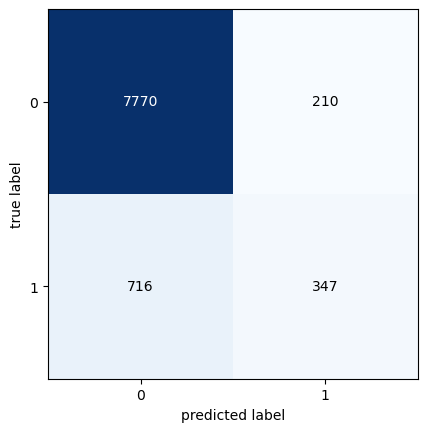


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.77
Macro Recall: 0.65
Macro F1-score: 0.69

Weighted Precision: 0.88
Weighted Recall: 0.90
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



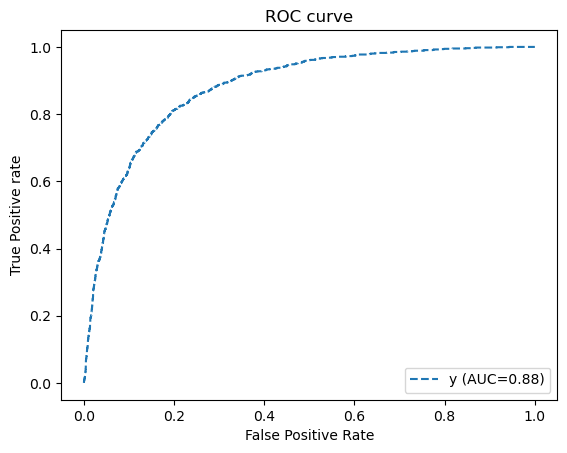

AUC_Score:  0.8798662932024323


In [13]:
def model_scaling(dataset):
    
    X = dataset.iloc[:,:-1] # independant variables
    y = dataset.iloc[:,16:] ## dependant variable

    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    X['default']= label_encoder.fit_transform(X['default'])
    X['housing']= label_encoder.fit_transform(X['housing'])
    X['loan']= label_encoder.fit_transform(X['loan'])
    X['month']= label_encoder.fit_transform(X['month'])
    y['y']= label_encoder.fit_transform(y['y'])
    X=pd.get_dummies(columns=['education','job','marital','contact','poutcome'],data=X)


    X=X.astype(int)
    y=y.astype(int)

    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

    from sklearn.preprocessing import StandardScaler

    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)


    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    print('Accuracy of Logistic regression on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)

    confusion_matrix(y_test,y_pred)

    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)


model_scaling(dataset)

# Model with StandardScaler is giving better accuracy and ROC_AUC_Score, hence we can consider this model to classify whether the client has subscribed a term deposit or not
